### Testing the original model with some holonomic movement

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt

import central_complex
import cx_rate
import trials
import analysis
import plotter

save_figs=True

### Generate outbound routes

Use the `trials` module to generate an outbound route. Internally this is using the `bee_simulator` and `central_complex` modules to simulate the physics and electrophysiology.

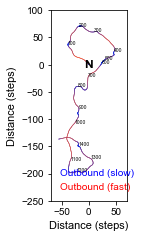

In [7]:
load_route = False
save_route = False

T_outbound = 1500
T_inbound = 0
noise = 0.1

cx = cx_rate.CXRatePontin(noise=noise)

#np.save('h.npy',h)
#np.save('vx.npy',v[:,0])
#np.save('vy.npy',v[:,1])

h = np.load('h.npy')
vx = np.load('vx.npy')
vy = np.load('vy.npy')
v = np.vstack((vx,vy)).T

h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                            T_outbound=T_outbound,
                                            T_inbound=T_inbound,
                                            noise=noise,
                                            cx=cx,
                                            route=(h[:T_outbound], v[:T_outbound]))

if save_route and not load_route:
    print("saving...")
    trials.save_route(h=h, v=v, cx_log=log, filename=route_file)

fig, ax = plotter.plot_route(h, v, T_outbound=T_outbound, T_inbound=T_inbound,
                   plot_speed=True, plot_heading=True, quiver_color='black')
        
if save_figs:
    plotter.save_plot(fig, 'route/x_example_route')

/Users/hyundonglee/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


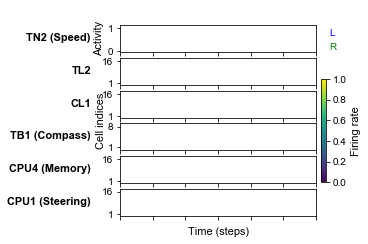

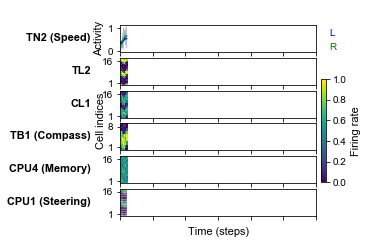

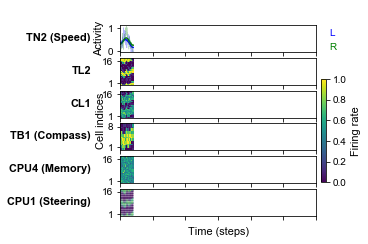

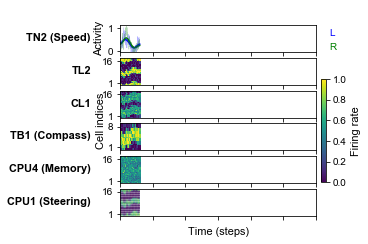

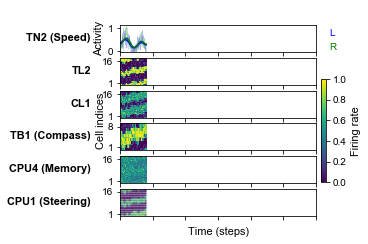

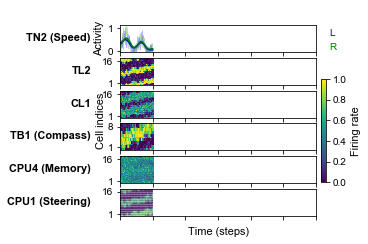

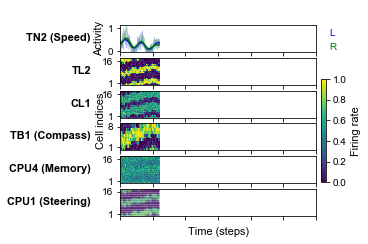

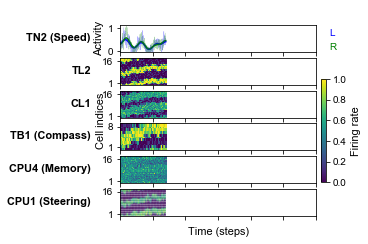

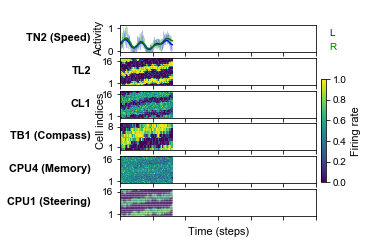

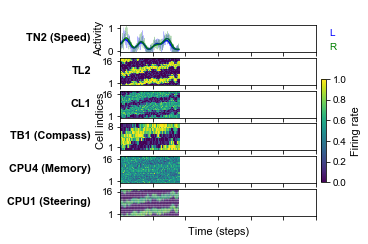

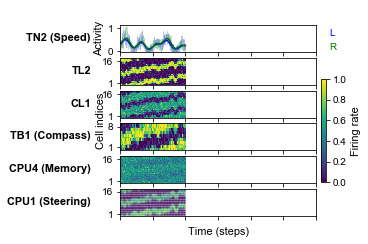

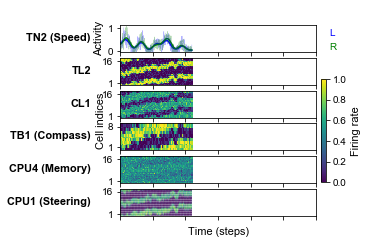

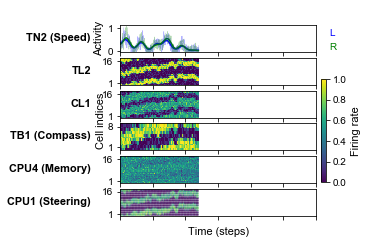

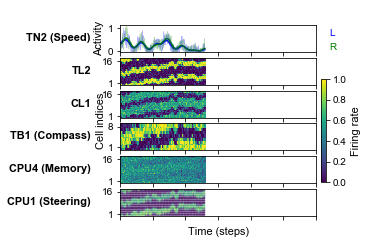

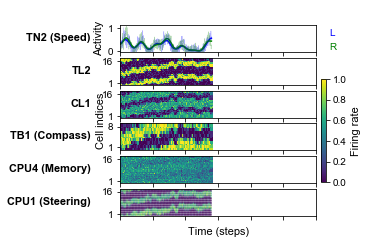

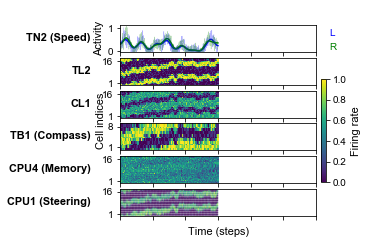

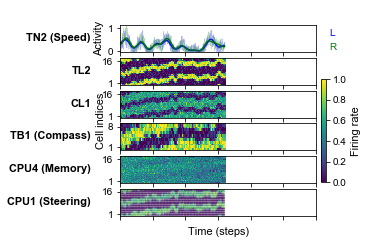

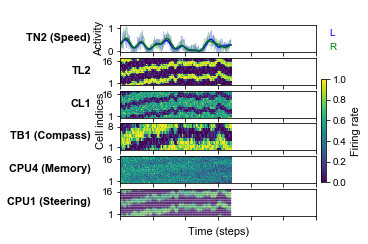

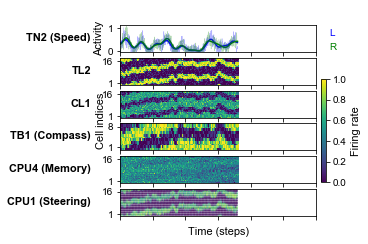

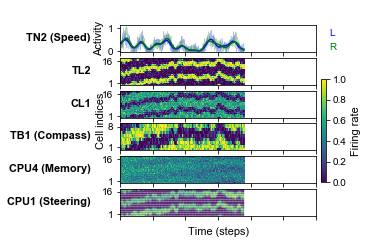

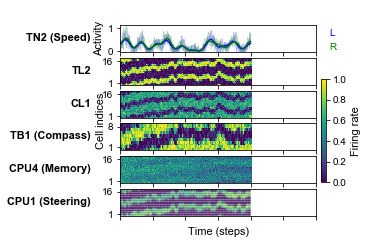

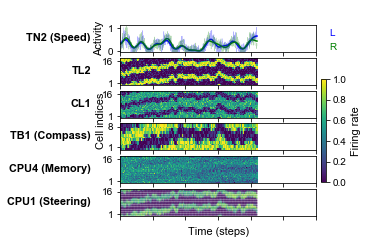

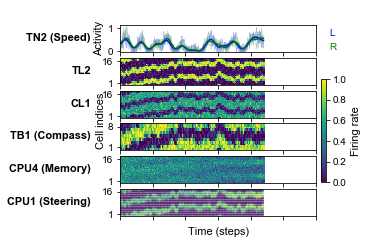

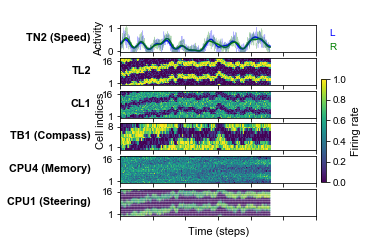

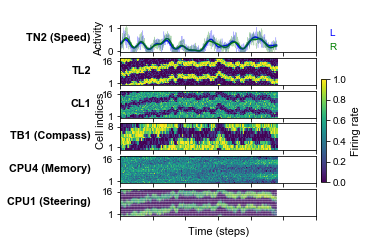

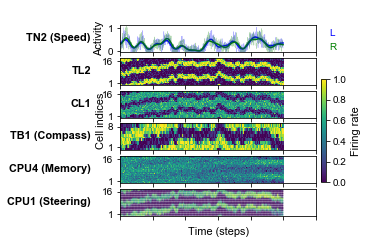

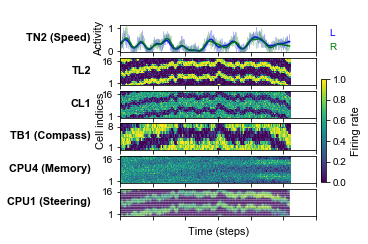

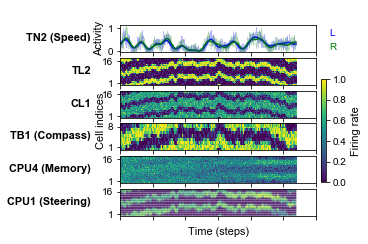

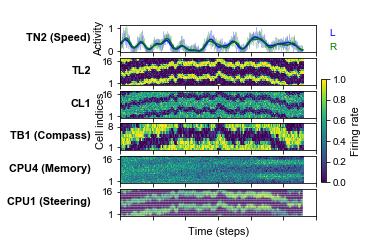

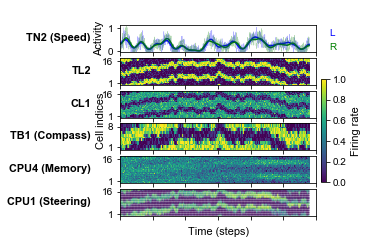

In [10]:
i = 0
while i < 1500:
    tn2 = log.tn2
    log.tn2 = tn2[:,0:i]
    cl1 = log.cl1
    log.cl1 = cl1[:,0:i]
    tb1 = log.tb1
    log.tb1 = tb1[:,0:i]
    cpu4 = log.cpu4
    log.cpu4 = cpu4[:,0:i]
    cpu1 = log.cpu1
    log.cpu1 = cpu1[:,0:i]
    tl2 = log.tl2
    log.tl2 = tl2[:,0:i]

    fig, ax = plotter.plot_traces(
            log, include=['TN2', 'TL2', 'CL1', 'TB1', 'CPU4', 'CPU1'])
            #trimmed_log, include=['TN1', 'TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], t_start=start)
    log.tn2 = tn2
    log.cl1 = cl1
    log.tb1 = tb1
    log.cpu4 = cpu4
    log.cpu1 = cpu1
    log.tl2 = tl2
    if save_figs:
        plotter.save_plot(fig, 'heinze/x_example_traces_heinze_'+str(i))
    i += 50

In [7]:
data = np.load('data.npy')
uid = np.load('uid.npy')
noise = 0.1
cx = cx_rate.CXRatePontin(noise=noise)
T_outbound = 1500
T_inbound = 0
start = 0
length = 1500
trimmed_log = trials.CXLogger(T_outbound=T_outbound-start,
                              T_inbound=length-T_outbound+start,
                              cx=cx_rate.CXRate())


In [8]:
tb1 = {}
cpu1a = {}
cpu1b = {}
tn2 = {}
cl1 = {}
cpu4 = {}
tl2 = {}
for i in range(len(uid)):
    u = uid[i].decode("utf-8")
    if 'tb1' in u:
        u = u.split('_')
        tb1[u[1]] = data[:,i]
    if 'cpu1a' in u:
        u = u.split('_')
        cpu1a[u[1]] = data[:,i]
    if 'cpu1b' in u:
        u = u.split('_')
        cpu1b[u[1]] = data[:,i]
    if 'tn2' in u:
        u = u.split('_')
        tn2[u[1]] = data[:,i]
    if 'cl1' in u:
        u = u.split('_')
        cl1[u[1]] = data[:,i]
    if 'cpu4' in u:
        u = u.split('_')
        cpu4[u[1]] = data[:,i]
    if 'tl2' in u:
        u = u.split('_')
        tl2[u[1]] = data[:,i]

In [9]:
for i in range(len(tb1)):
    if i == 0:
        trimmed_log.tb1 = tb1[str(i)]
    else:
        trimmed_log.tb1 = np.vstack((trimmed_log.tb1,tb1[str(i)]))
for i in range(len(cpu1a)):
    if i == 0:
        trimmed_log.cpu1a = cpu1a[str(i)]
    else:
        trimmed_log.cpu1a = np.vstack((trimmed_log.cpu1a,cpu1a[str(i)]))
for i in range(len(cpu1b)):
    if i == 0:
        trimmed_log.cpu1b = cpu1b[str(i)]
    else:
        trimmed_log.cpu1b = np.vstack((trimmed_log.cpu1b,cpu1b[str(i)]))
for i in range(len(tn2)):
    if i == 0:
        trimmed_log.tn2 = tn2[str(i)]
    else:
        trimmed_log.tn2 = np.vstack((trimmed_log.tn2,tn2[str(i)]))
for i in range(len(cl1)):
    if i == 0:
        trimmed_log.cl1 = cl1[str(i)]
    else:
        trimmed_log.cl1 = np.vstack((trimmed_log.cl1,cl1[str(i)]))
for i in range(len(cpu4)):
    if i == 0:
        trimmed_log.cpu4 = cpu4[str(i)]
    else:
        trimmed_log.cpu4 = np.vstack((trimmed_log.cpu4,cpu4[str(i)]))
for i in range(len(tl2)):
    if i == 0:
        trimmed_log.tl2 = tl2[str(i)]
    else:
        trimmed_log.tl2 = np.vstack((trimmed_log.tl2,tl2[str(i)]))

In [10]:
trimmed_log.cpu1 = trimmed_log.cpu1b[1,:]
for i in range(14):
    trimmed_log.cpu1 = np.vstack((trimmed_log.cpu1,trimmed_log.cpu1a[i,:]))
trimmed_log.cpu1 = np.vstack((trimmed_log.cpu1,trimmed_log.cpu1b[0,:]))

In [ ]:
i = 0
#tn2_lpu = trimmed_log.tn2
#trimmed_log.tn2 = tn_heinze
while i < 1500:
    tn2 = trimmed_log.tn2
    trimmed_log.tn2 = tn2[:,0:i]
    cl1 = trimmed_log.cl1
    trimmed_log.cl1 = cl1[:,0:i]
    tb1 = trimmed_log.tb1
    trimmed_log.tb1 = tb1[:,0:i]
    cpu4 = trimmed_log.cpu4
    trimmed_log.cpu4 = cpu4[:,0:i]
    cpu1 = trimmed_log.cpu1
    trimmed_log.cpu1 = cpu1[:,0:i]
    tl2 = trimmed_log.tl2
    trimmed_log.tl2 = tl2[:,0:i]
    
    fig, ax = plotter.plot_traces(
            trimmed_log, include=['TN2', 'TL2', 'CL1', 'TB1', 'CPU4', 'CPU1'])
            #trimmed_log, include=['TN1', 'TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], t_start=start)
    trimmed_log.tn2 = tn2
    trimmed_log.cl1 = cl1
    trimmed_log.tb1 = tb1
    trimmed_log.cpu4 = cpu4
    trimmed_log.cpu1 = cpu1
    trimmed_log.tl2 = tl2
    if save_figs:
        plotter.save_plot(fig, 'lpu/x_example_traces_'+str(i))
    i += 50

In [204]:
import os
os.system("opencv-python3")
import cv2 as cv
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [104]:
i=0
while i < 1500:
    im=cv.imread('./plots/route/example_route_'+str(i)+'.jpg')
    im2=cv.imread('./plots/heinze/x_example_traces_heinze_'+str(i)+'.jpg')
    im3=cv.imread('./plots/lpu/x_example_traces_'+str(i)+'.jpg')
    im=cv.resize(im,(im2.shape[1],im2.shape[0]))
    im3=cv.resize(im3,(im2.shape[1],im2.shape[0]))
    im4 = np.concatenate((im,im2,im3),axis=0)
    cv.imwrite('./plots/concat/x_concat_'+str(i)+'.jpg',im4)
    i += 50

The default acceration, drag and rotation params ensure that drift rarely exceeds pi/4 and speed remains under 1.0.

This is necessary for the partially holonomic model of path integration.

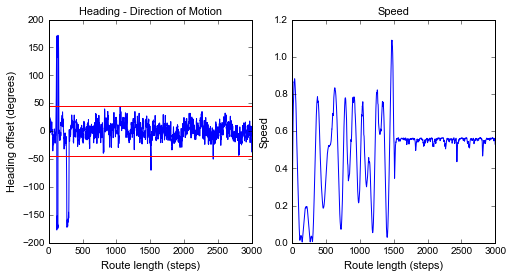

In [4]:
fig, ax = plt.subplots(1,2, figsize =(8,4))
plotter.plot_angle_of_motion(h, v, ax[0])
plotter.plot_speed(v, ax[1])
if save_figs:
    plotter.save_plot(fig, 'example_motion_properties')

### Collect bulk data

In [5]:
def analyse(N, param_dict):
    """Iterates through param dictionary, running batches of trials according to the param dictionary"""
    min_dists =[]
    min_dist_stds = []
    disk_leaving_angles = []
    
    cx_decoder = cx_rate.CXRatePontin()  # Default rate model for decoding
    
    for i in range(param_dict['n']):
        kwargs = {}
        for k, v in param_dict.iteritems():
            if k != 'n' and v[i] != None:
                kwargs[k] = v[i]
                        
        H, V, cpu4_snapshot = trials.generate_dataset(N=N, **kwargs)
        
        if 'T_outbound' in kwargs:
            T_outbound = kwargs['T_outbound']
        else:
            T_outbound = 1500

        # Closest position to nest within return part.
        min_d, min_d_sigma = analysis.compute_closest_to_nest(V, T_outbound)
        
        # Angular distance between angle to nest and location where agent leaves radius around turning point 
        # (To mimic some behavioural experiments)
        disk_leaving_angle = analysis.compute_disk_leaving_angle(V, T_outbound)

        min_dists.append(min_d)
        min_dist_stds.append(min_d_sigma)
        disk_leaving_angles.append(disk_leaving_angle)
    
    return min_dists, min_dist_stds, disk_leaving_angles

Run N trials at different path distances AND four different noise values, also using completely random homing. Analyse each set of trials for average error and minimum distance

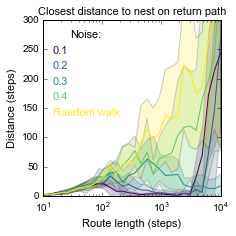

In [6]:
N = 10 #100
N_dists = 30
distances = np.round(10 ** np.linspace(1, 4, N_dists)).astype('int')
noise_vals = [0.1, 0.2, 0.3, 0.4]
noise_legend_vals = noise_vals + ['Random']

param_dicts = [{'n':N_dists, 'noise': [noise]*N_dists, 'T_outbound': distances, 'T_inbound': distances} for noise in noise_vals]
param_dicts.append({'n':N_dists, 'T_outbound': distances, 'T_inbound': distances, 'random_homing':[True]*N_dists})

for param_dict in param_dicts:
    param_dict['cx_class'] = [cx_rate.CXRatePontin] * param_dict['n']

errors_l = []
error_stds_l = []
min_dists_l = []
min_dist_stds_l = []
    
for param_dict in param_dicts:
    min_dists, min_dist_stds, _ = analyse(N, param_dict)
    min_dists_l.append(min_dists)
    min_dist_stds_l.append(min_dist_stds)

fig, ax = plotter.plot_distance_v_noise(min_dists_l,
                                        min_dist_stds_l,
                                        distances,
                                        noise_legend_vals,
                                        title='Closest distance to nest on return path')

if save_figs:
    plotter.save_plot(fig, 'noise_v_distance_memory')

Run N trials at four different noise values, also using completely random homing. Analyse each set of trials for angular offset from nest

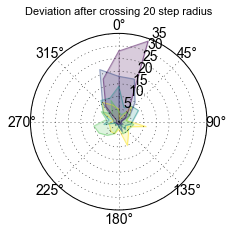

In [7]:
N = 100 #1000
noise = [0.1, 0.2, 0.3, 0.4, 0.1]
random_homing = [None, None, None, None, True]
noise_legend_vals = [0.1, 0.2, 0.3, 0.4, 'Random']

param_dict = {'n':len(noise),
              'noise': noise,
              'random_homing': random_homing,
              'cx_class': [cx_rate.CXRatePontin] * len(noise)}
  
# Analyse
_, _, disk_leaving_angles = analyse(N, param_dict)

# Plot results
fig, ax = plotter.plot_angular_distances(
        noise_legend_vals, disk_leaving_angles,# log_scale=True,
        title='Deviation after crossing 20 step radius')
if save_figs:
    plotter.save_plot(fig, 'angle_offset_20_step_radius')

Run N trials across a wide range of parameter ranges, aiming to break the model

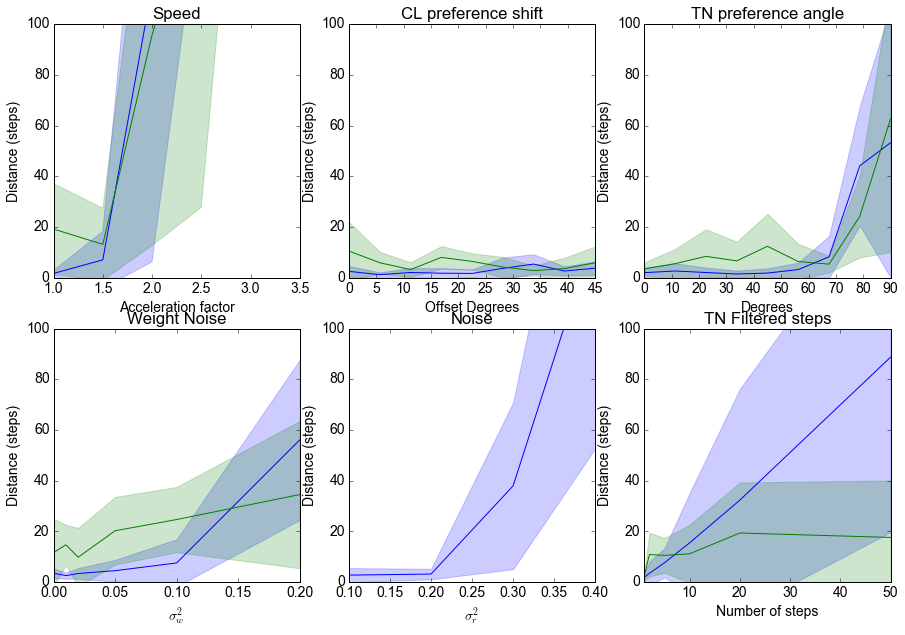

In [9]:
N = 10 #1000
T_outbound = 1500
T_inbound = 1500
T = T_outbound + T_inbound

distances = np.array([1000, 2000, 5000, 10000, 20000, 50000])
acc_factors = np.array([1, 1.5, 2, 2.5, 3, 3.5]) 
acc_out = acc_factors * trials.default_acc
bump_shift = np.linspace(0, np.pi/4, 9)
tn_prefs = np.linspace(0.0, np.pi/2, 9)
weight_noise = [0.0, 0.01, 0.02, 0.05, 0.1, 0.2]
noise = [0.1, 0.2, 0.3, 0.4]
filtered_steps = [1, 2, 5, 10, 20, 50]

#param_dicts = [{'n':len(distances), 'T_outbound': distances, 'T_inbound': distances},
param_dicts = [{'n':len(acc_out), 'acc_out': acc_out, 'T_inbound': (acc_factors * T_inbound).astype('int')},
               {'n':len(bump_shift), 'bump_shift': bump_shift},
               {'n':len(tn_prefs), 'tn_prefs': tn_prefs},
               {'n':len(weight_noise), 'weight_noise': weight_noise},
               {'n':len(noise), 'noise': noise},
               {'n':len(filtered_steps), 'filtered_steps': filtered_steps}
]

for param_dict in param_dicts:
    param_dict['cx_class'] = [cx_rate.CXRatePontin] * param_dict['n']
#noise_levels = [0.4]

x_ticks = [acc_factors, np.rad2deg(bump_shift), np.rad2deg(tn_prefs), weight_noise, noise, filtered_steps]
x_labels = ['Acceleration factor', 'Offset Degrees', 'Degrees', '$\sigma_w^2$', '$\sigma_r^2$', 'Number of steps']
titles = ['Speed', 'CL preference shift','TN preference angle', 'Weight Noise', 'Noise', 'TN Filtered steps']

fig, ax = plt.subplots(2,3, figsize=(15,10))

for i in range(2):
    for j, param_dict in enumerate(param_dicts):
        color = 'blue'
        if i % 2 == 1:
            if j == 4: # Don't do this to the noise plot
                continue
            param_dict['noise'] = np.zeros(param_dict['n'])
            color= 'green'

        min_dists, min_dist_stds, _ = analyse(N, param_dict)

        ax[j/3][j%3].plot(x_ticks[j], min_dists, color=color)
        ax[j/3][j%3].set_title(titles[j])
        ax[j/3][j%3].set_xlabel(x_labels[j])
        ax[j/3][j%3].set_ylabel('Distance (steps)')
        ax[j/3][j%3].set_xlim([x_ticks[j][0], x_ticks[j][-1]])
        ax[j/3][j%3].set_ylim([0,100])
        ax[j/3][j%3].fill_between(x_ticks[j],
                                  [m+s for m, s in zip(min_dists, min_dist_stds)],
                                  [m-s for m, s in zip(min_dists, min_dist_stds)],
                                  alpha=0.2,
                                  color=color);

if save_figs:
    plotter.save_plot(fig, 'breaking_the_model_pos_estimate')

Calculate straightness of path home

Tortoisity for mean homebound path up to 1 route length of steps is 1.18604222952


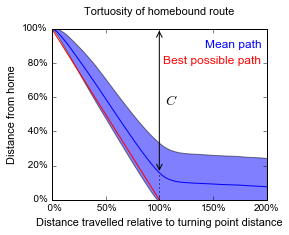

In [10]:
N=100
T_outbound=1500
T_inbound=1500
noise = 0.1

H, V, _ = trials.generate_dataset(T_outbound, T_inbound, noise, N, cx_class=cx_rate.CXRatePontin)
cum_min_dist = analysis.compute_path_straightness(V, T_outbound)

fig, ax = plotter.plot_route_straightness(cum_min_dist)
if save_figs:
    plotter.save_plot(fig, 'path_straightness')
    
tort = analysis.compute_tortuosity(cum_min_dist)
print "Tortoisity for mean homebound path up to 1 route length of steps is", tort

We can calculate the tortuosity using the most basic formula: $$\tau = L / C$$